## Visualise wavelet filters

Example script originally taken from https://github.com/kymatio/kymatio/blob/master/examples/2d/plot_filters.py to visualise 2D wavelet filters


In [1]:
from colorsys import hls_to_rgb
import matplotlib.pyplot as plt
import numpy as np
from kymatio.scattering2d.filter_bank import filter_bank
from kymatio.scattering2d.utils import fft2




ModuleNotFoundError: No module named 'kymatio'

In [2]:
import sys
print(sys.version)

3.8.7 (default, Jan 14 2021, 16:21:41) 
[GCC 9.3.0]


In [16]:
###############################################################################
# Initial parameters of the filter bank
# -------------------------------------
M = 64
J = 3
L = 8
filters_set = filter_bank(M, M, J, L=L)

In [17]:
np.shape(filters_set["psi"][0][0])

(64, 64)

<ipython-input-18-b527cd3ce8e9>:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


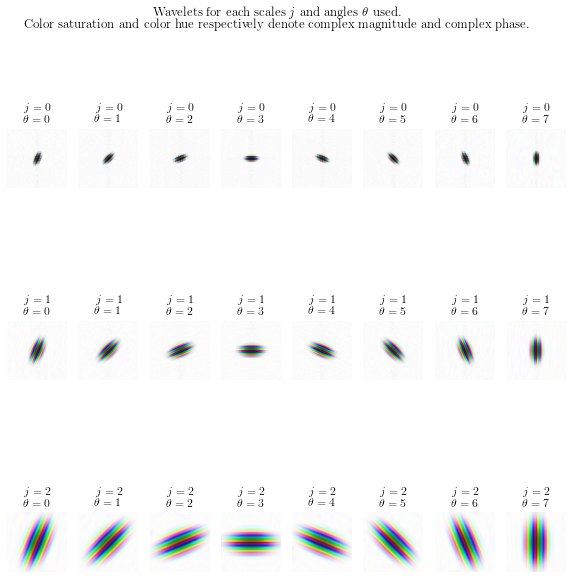

In [18]:
###############################################################################
# Imshow complex images
# ---------------------
# Thanks to https://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array


def colorize(z):
    n, m = z.shape
    c = np.zeros((n, m, 3))
    c[np.isinf(z)] = (1.0, 1.0, 1.0)
    c[np.isnan(z)] = (0.5, 0.5, 0.5)

    idx = ~(np.isinf(z) + np.isnan(z))
    A = (np.angle(z[idx]) + np.pi) / (2*np.pi)
    A = (A + 0.5) % 1.0
    B = 1.0/(1.0 + abs(z[idx])**0.3)
    c[idx] = [hls_to_rgb(a, b, 0.8) for a, b in zip(A, B)]
    return c

###############################################################################
# Bandpass filters
# ----------------
# First, we display each wavelet according to its scale and orientation.
fig, axs = plt.subplots(J, L, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
i = 0
for filter in filters_set['psi']:
    f = filter[0]
    filter_c = fft2(f)
    filter_c = np.fft.fftshift(filter_c)
    axs[i // L, i % L].imshow(colorize(filter_c))
    axs[i // L, i % L].axis('off')
    axs[i // L, i % L].set_title(
        "$j = {}$ \n $\\theta={}$".format(i // L, i % L))
    i = i+1

fig.suptitle((r"Wavelets for each scales $j$ and angles $\theta$ used."
              "\nColor saturation and color hue respectively denote complex "
              "magnitude and complex phase."), fontsize=13)
fig.show()



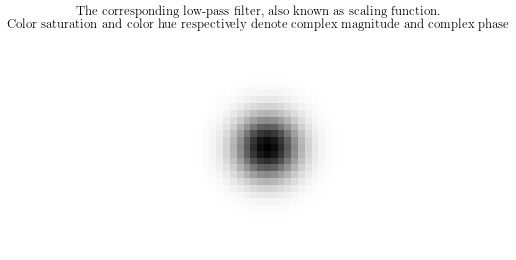

In [6]:
###############################################################################
# Lowpass filter
# --------------
# We finally display the low-pass filter.
plt.figure()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.axis('off')
plt.set_cmap('gray_r')

f = filters_set['phi'][0]

filter_c = fft2(f)
filter_c = np.fft.fftshift(filter_c)
plt.suptitle(("The corresponding low-pass filter, also known as scaling "
              "function.\nColor saturation and color hue respectively denote "
              "complex magnitude and complex phase"), fontsize=13)
filter_c = np.abs(filter_c)
plt.imshow(filter_c)

plt.show()

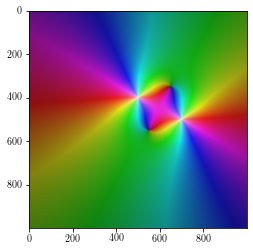

In [19]:
import numpy as np
from numpy import pi
import pylab as plt
from colorsys import hls_to_rgb

def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg + pi)  / (2 * pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.3)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    return c

N=1000
x,y = np.ogrid[-5:5:N*1j, -5:5:N*1j]
z = x + 1j*y

w = 1/(z+1j)**2 + 1/(z-2)**2
img = colorize(w)
plt.imshow(img)
plt.show()